## $Fourier Series$

- Fourier Series is a way to represent a periodic function as a sum of sine and cosine functions, or equivalently, as a sum of complex exponentials, each with different frequencies and amplitudes.

- About the formula :

 $f(x)=\dfrac{a_0}{2}+\displaystyle\sum_{n=1}^{\infty}\left(a_n\cos \dfrac{2\pi n x}{T}+b_n\sin \dfrac{2\pi nx}{T}\right)$ 

 $a_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\cos\dfrac{2\pi nx}{T}dx$

$b_n=\dfrac{2}{T}\displaystyle\int_0^{T}f(x)\sin\dfrac{2\pi nx}{T}dx$

- In this section I will use python to create a fourier series function and use it to draw
a graph

In [20]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import sympy as sym

In [21]:
def fourier_series():
    t, n = sym.symbols('t n')
    T = 2 * sym.pi

    f = sym.Piecewise((0, t < 0), (1, t < sym.pi), (0, True))

    a0 = 1 / T * sym.integrate(f, (t, 0, T))
    an = 2 / T * sym.integrate(f * sym.cos(n * t), (t, 0, T))
    bn = 2 / T * sym.integrate(f * sym.sin(n * t), (t, 0, T))

    s = a0 / 2 + sym.summation(an * sym.cos(n * t) + bn * sym.sin(n * t), (n, 1, 10))
    
    return s, a0, an, bn

In [22]:
s, a0, an, bn = fourier_series()

from sympy import latex
from IPython.display import display, Math

display(Math(r'f(x) = \frac{a_0}{2} + \sum_{{n=1}}^{\infty} \left( a_n \cos \frac{{2\pi n x}}{{T}} + b_n \sin \frac{{2\pi n x}}{{T}} \right)'))
display(Math(r'a_n = \frac{2}{T} \int_{{0}}^{{T}} f(x) \cos \frac{{2\pi nx}}{{T}} \, dx'))
display(Math(r'b_n = \frac{2}{T} \int_{{0}}^{{T}} f(x) \sin \frac{{2\pi nx}}{{T}} \, dx'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- Use graph to show it

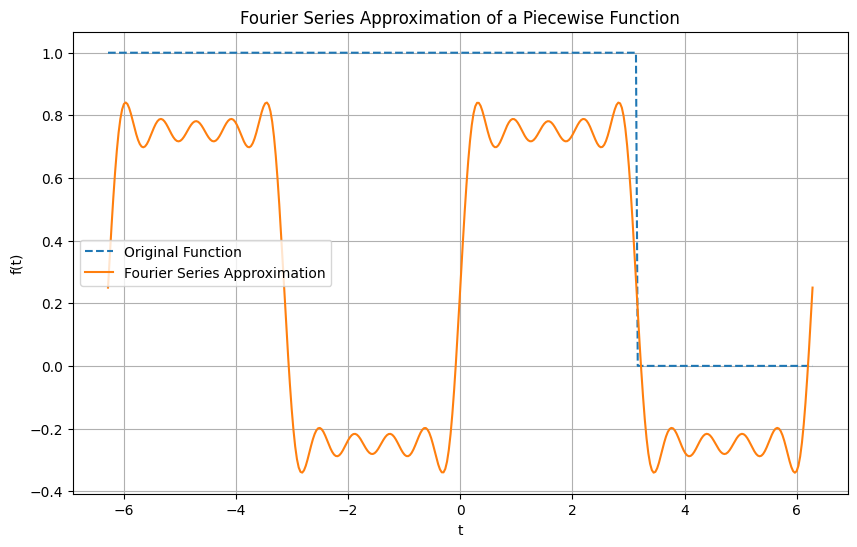

In [23]:
t_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
f_piecewise = np.piecewise(t_vals, [t_vals < 0, t_vals < np.pi, t_vals >= np.pi], [0, 1, 0])

s_func = sym.lambdify(sym.symbols('t'), s, 'numpy')

s_vals = s_func(t_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, f_piecewise, label='Original Function', linestyle='--')
plt.plot(t_vals, s_vals, label='Fourier Series Approximation')
plt.title('Fourier Series Approximation of a Piecewise Function')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()